In [168]:
import pandas as pd

df = pd.read_csv("data/UBL_Stock_Advantage_Fund_NAV_Synthetic.csv",parse_dates=['Date'])



In [169]:
print(df.head())
print(df.columns)


        Date       NAV
0 2020-01-01  100.1193
1 2020-01-02  100.1117
2 2020-01-03  100.2614
3 2020-01-06  100.5868
4 2020-01-07  100.5599
Index(['Date', 'NAV'], dtype='object')


In [170]:
print(df.isnull().sum())

Date    0
NAV     0
dtype: int64


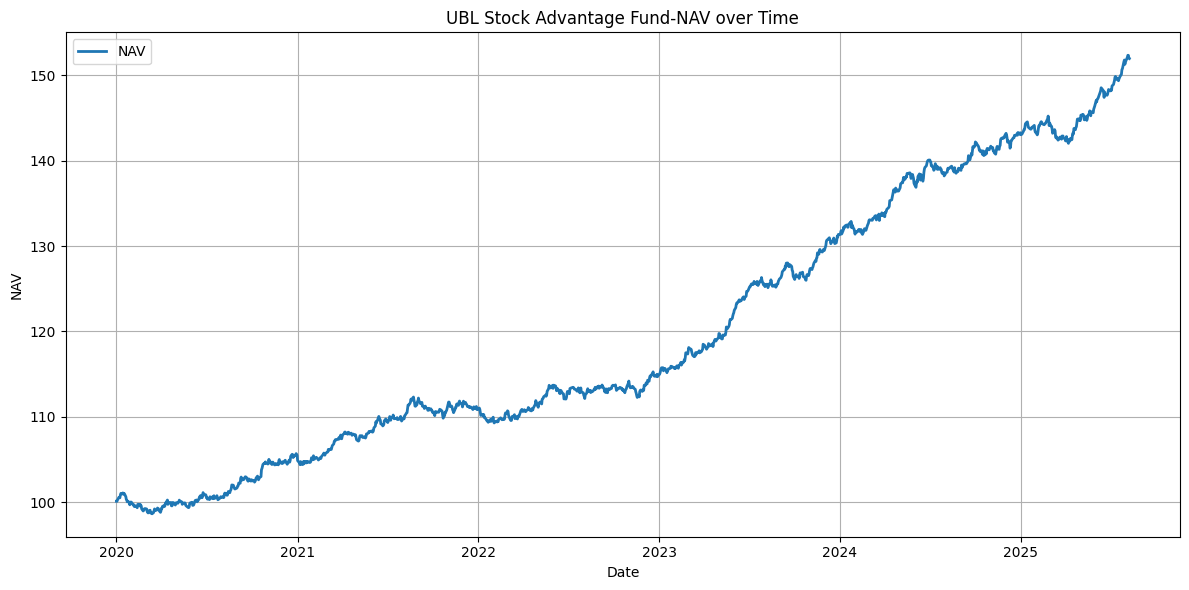

In [179]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['NAV'],label='NAV',linewidth=2)
plt.title("UBL Stock Advantage Fund-NAV over Time")
plt.xlabel('Date')
plt.ylabel('NAV')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [180]:
import numpy as np

sip_amount = 10000
monthly_nav = df.set_index("Date").resample("BMS").first().reset_index()
monthly_nav["Units"] = sip_amount/monthly_nav["NAV"]
monthly_nav["Total Units"] = monthly_nav["Units"].cumsum()

latest_nav =df["NAV"].iloc[-1]
monthly_nav["Portfolio Value"] = monthly_nav['Total Units'] * latest_nav

total_invested = sip_amount * len(monthly_nav)

final_value = monthly_nav['Portfolio Value'].iloc[-1]

years = (monthly_nav['Date'].iloc[-1] - monthly_nav["Date"].iloc[0]).days/ 365.25
CAGR = (final_value/total_invested) ** (1/years) -1

print(f"Total Invested: Rs{total_invested:,.0f}")
print(f"Final Portfolio Value: Rs{final_value:,.0f}")
print(f"CAGR:{CAGR * 100:.2f}%")

Total Invested: Rs680,000
Final Portfolio Value: Rs876,729
CAGR:4.66%


In [182]:
monthly_nav['Monthly Return'] = monthly_nav["NAV"].pct_change()


volatility = monthly_nav['Monthly Return'].std() * np.sqrt(12)
average_return = monthly_nav["Monthly Return"].mean() * 12
sharpe_ratio = average_return/volatility

In [183]:
cumulative_nav = monthly_nav["NAV"].cummax()
drawdown = (monthly_nav["NAV"] - cumulative_nav)/ cumulative_nav
max_drawdown = drawdown.min()

print(f"Annualized Volatility: {volatility*100:.2f}%")
print(f"Annualized Return: {average_return*100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown*100:.2f}%")

Annualized Volatility: 3.39%
Annualized Return: 7.52%
Sharpe Ratio: 2.22
Maximum Drawdown: -2.13%


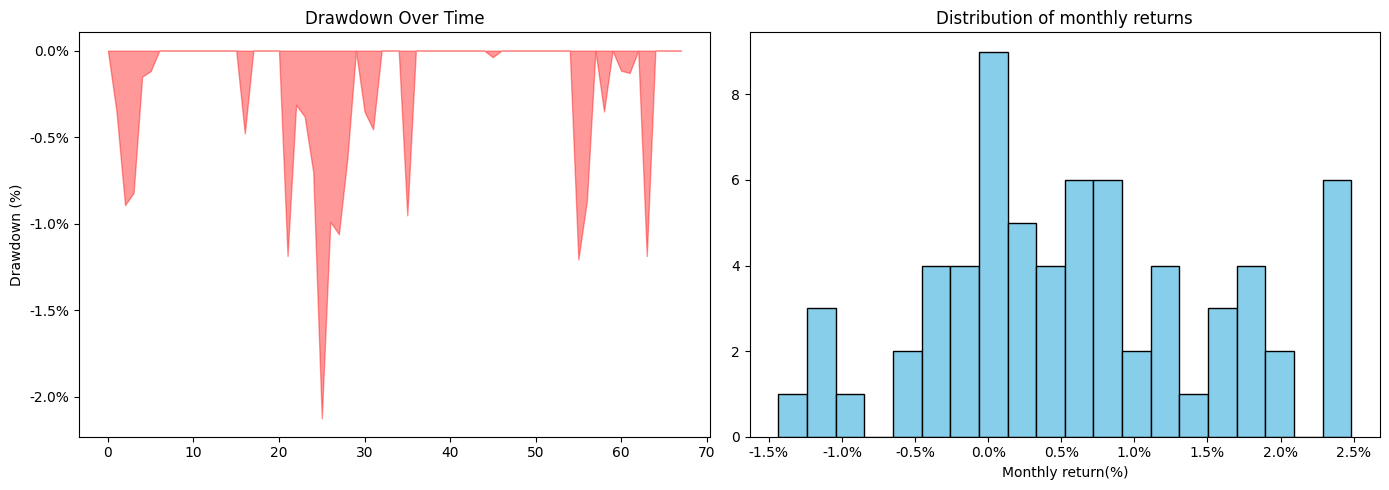

In [194]:
fig, axes = plt.subplots(1,2, figsize=(14,5))

axes[0].fill_between(monthly_nav.index,drawdown,0,color='red', alpha=0.4)
axes[0].set_title("Drawdown Over Time")
axes[0].set_ylabel("Drawdown (%)")
axes[0].yaxis.set_major_formatter(lambda x,_: f"{x*100:.1f}%")

axes[1].hist(monthly_nav['Monthly Return'].dropna(),bins=20,color="skyblue",edgecolor="black")
axes[1].set_title("Distribution of monthly returns")
axes[1].set_xlabel("Monthly return(%)")
axes[1].xaxis.set_major_formatter(lambda x,_: f"{x*100:.1f}%")

plt.tight_layout()
plt.show()

In [197]:
df_HBL =pd.read_csv("data/HBL_Stock_Advantage_Fund_NAV.csv",parse_dates=["Date"])
print(df_HBL.head())
print(df_HBL.columns)

                        Date         NAV
0 2020-08-31 15:21:57.180448  101.593428
1 2020-09-30 15:21:57.180448  101.922054
2 2020-10-31 15:21:57.180448  103.853861
3 2020-11-30 15:21:57.180448  107.640435
4 2020-12-31 15:21:57.180448  107.782190
Index(['Date', 'NAV'], dtype='object')


In [198]:
print(df_HBL.isnull().sum())

Date    0
NAV     0
dtype: int64


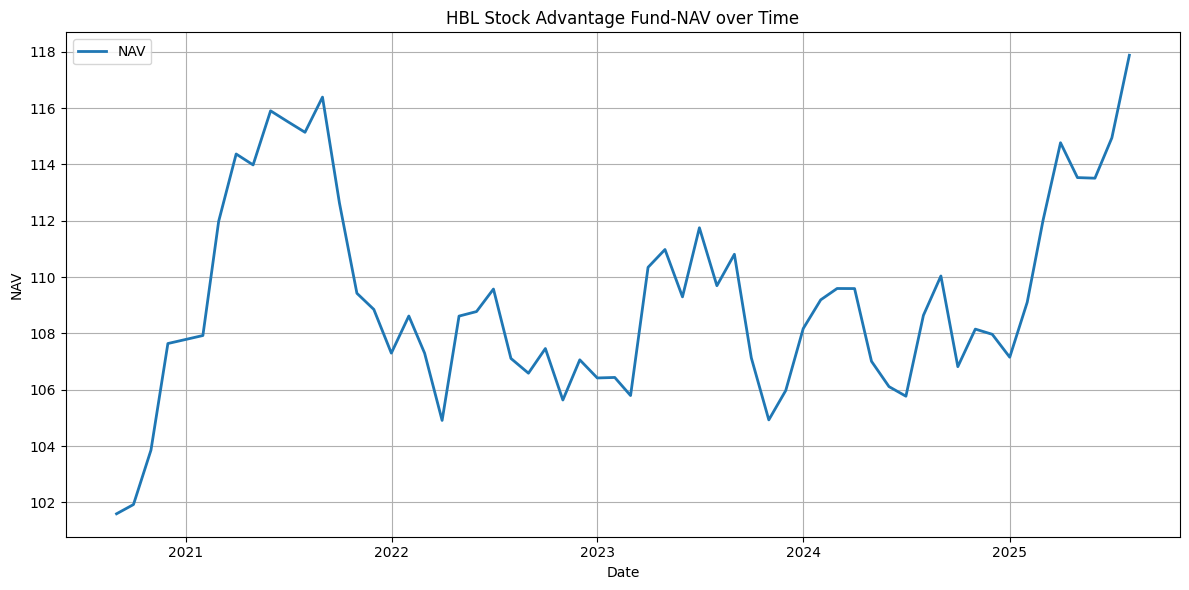

In [206]:
plt.figure(figsize=(12,6))
plt.plot(df_HBL["Date"],df_HBL["NAV"],label='NAV',linewidth=2)
plt.title("HBL Stock Advantage Fund-NAV over Time")
plt.xlabel("Date")
plt.ylabel("NAV")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [207]:
sip_amount = 10000
monthly_nav = df_HBL.set_index("Date").resample("BMS").first().reset_index()
monthly_nav["Units"] = sip_amount/monthly_nav["NAV"]
monthly_nav["Total Units"] = monthly_nav["Units"].cumsum()

latest_nav =df_HBL["NAV"].iloc[-1]
monthly_nav["Portfolio Value"] = monthly_nav['Total Units'] * latest_nav

total_invested = sip_amount * len(monthly_nav)

final_value = monthly_nav['Portfolio Value'].iloc[-1]

years = (monthly_nav['Date'].iloc[-1] - monthly_nav["Date"].iloc[0]).days/ 365.25
CAGR = (final_value/total_invested) ** (1/years) -1

print(f"Total Invested: Rs{total_invested:,.0f}")
print(f"Final Portfolio Value: Rs{final_value:,.0f}")
print(f"CAGR:{CAGR * 100:.2f}%")

Total Invested: Rs600,000
Final Portfolio Value: Rs648,207
CAGR:1.59%


In [208]:
monthly_nav['Monthly Return'] = monthly_nav["NAV"].pct_change()


volatility = monthly_nav['Monthly Return'].std() * np.sqrt(12)
average_return = monthly_nav["Monthly Return"].mean() * 12
sharpe_ratio = average_return/volatility

cumulative_nav = monthly_nav["NAV"].cummax()
drawdown = (monthly_nav["NAV"] - cumulative_nav)/ cumulative_nav
max_drawdown = drawdown.min()

print(f"Annualized Volatility: {volatility*100:.2f}%")
print(f"Annualized Return: {average_return*100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown*100:.2f}%")

Annualized Volatility: 6.32%
Annualized Return: 3.22%
Sharpe Ratio: 0.51
Maximum Drawdown: -9.86%


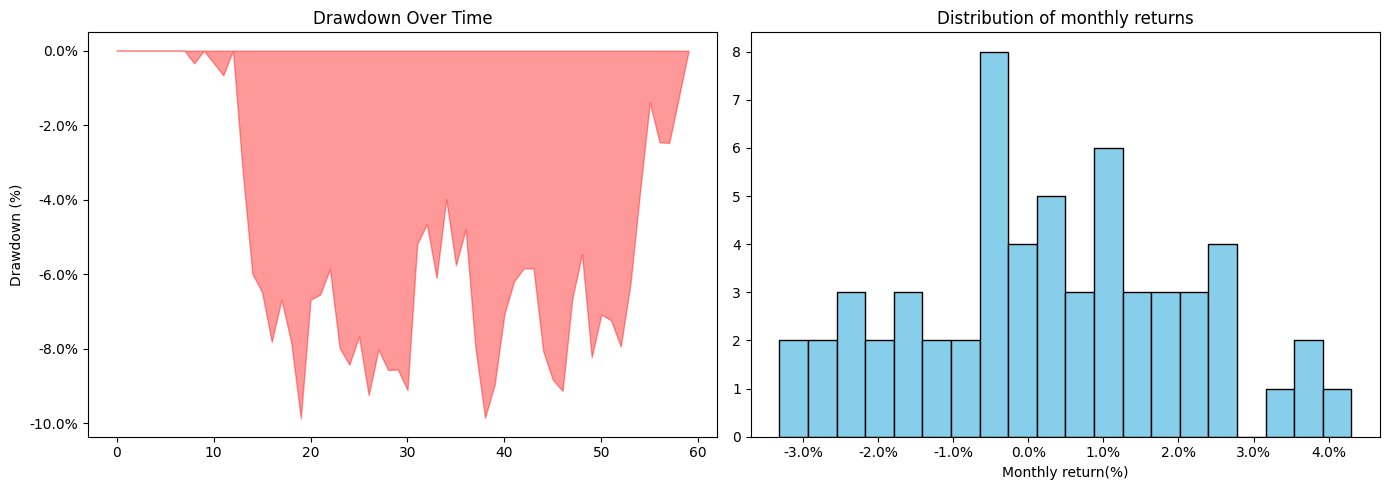

In [209]:
fig, axes = plt.subplots(1,2, figsize=(14,5))

axes[0].fill_between(monthly_nav.index,drawdown,0,color='red', alpha=0.4)
axes[0].set_title("Drawdown Over Time")
axes[0].set_ylabel("Drawdown (%)")
axes[0].yaxis.set_major_formatter(lambda x,_: f"{x*100:.1f}%")

axes[1].hist(monthly_nav['Monthly Return'].dropna(),bins=20,color="skyblue",edgecolor="black")
axes[1].set_title("Distribution of monthly returns")
axes[1].set_xlabel("Monthly return(%)")
axes[1].xaxis.set_major_formatter(lambda x,_: f"{x*100:.1f}%")

plt.tight_layout()
plt.show()

In [217]:
df_MCB = pd.read_csv("data/MCB_Stock_Advantage_Fund_NAV.csv",parse_dates=["Date"])
print(df_MCB.head())
print(df_MCB.columns)
print(df_MCB.isnull().sum())

                        Date         NAV
0 2020-08-31 15:21:57.182392  102.493818
1 2020-09-30 15:21:57.182392  101.822432
2 2020-10-31 15:21:57.182392  101.848478
3 2020-11-30 15:21:57.182392  100.844032
4 2020-12-31 15:21:57.182392   99.728471
Index(['Date', 'NAV'], dtype='object')
Date    0
NAV     0
dtype: int64


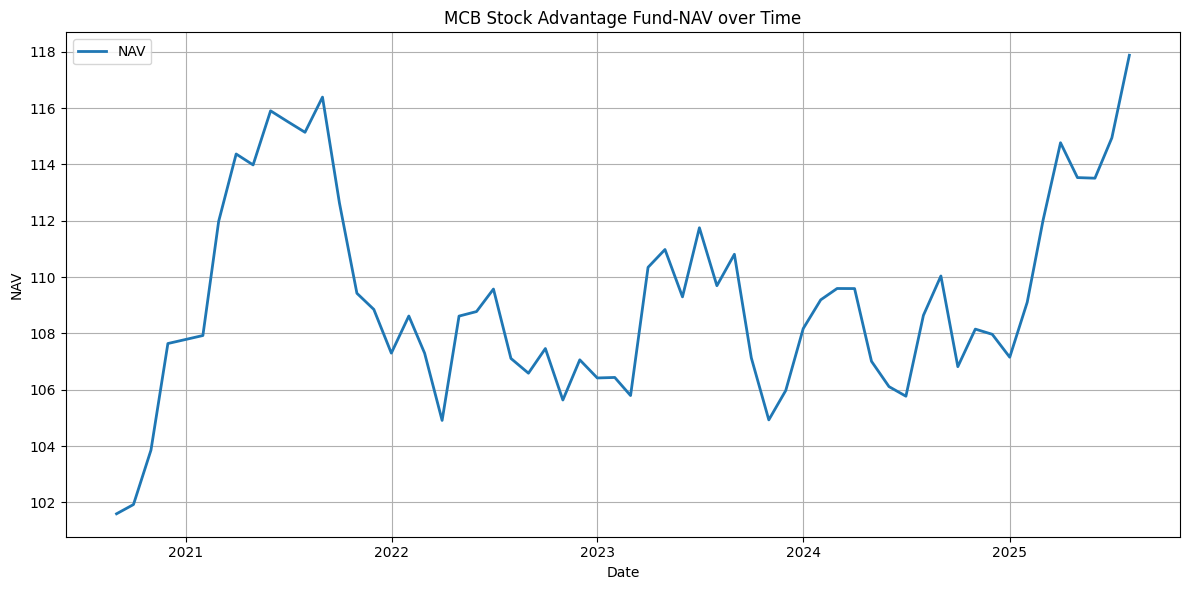

In [219]:
plt.figure(figsize=(12,6))
plt.plot(df_MCB["Date"],df_HBL["NAV"],label='NAV',linewidth=2)
plt.title("MCB Stock Advantage Fund-NAV over Time")
plt.xlabel("Date")
plt.ylabel("NAV")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [220]:
sip_amount = 10000
monthly_nav = df_MCB.set_index("Date").resample("BMS").first().reset_index()
monthly_nav["Units"] = sip_amount/monthly_nav["NAV"]
monthly_nav["Total Units"] = monthly_nav["Units"].cumsum()

latest_nav =df_MCB["NAV"].iloc[-1]
monthly_nav["Portfolio Value"] = monthly_nav['Total Units'] * latest_nav

total_invested = sip_amount * len(monthly_nav)

final_value = monthly_nav['Portfolio Value'].iloc[-1]

years = (monthly_nav['Date'].iloc[-1] - monthly_nav["Date"].iloc[0]).days/ 365.25
CAGR = (final_value/total_invested) ** (1/years) -1

print(f"Total Invested: Rs{total_invested:,.0f}")
print(f"Final Portfolio Value: Rs{final_value:,.0f}")
print(f"CAGR:{CAGR * 100:.2f}%")

Total Invested: Rs600,000
Final Portfolio Value: Rs765,391
CAGR:5.08%


In [221]:
monthly_nav['Monthly Return'] = monthly_nav["NAV"].pct_change()


volatility = monthly_nav['Monthly Return'].std() * np.sqrt(12)
average_return = monthly_nav["Monthly Return"].mean() * 12
sharpe_ratio = average_return/volatility

cumulative_nav = monthly_nav["NAV"].cummax()
drawdown = (monthly_nav["NAV"] - cumulative_nav)/ cumulative_nav
max_drawdown = drawdown.min()

print(f"Annualized Volatility: {volatility*100:.2f}%")
print(f"Annualized Return: {average_return*100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown*100:.2f}%")

Annualized Volatility: 4.98%
Annualized Return: 9.03%
Sharpe Ratio: 1.81
Maximum Drawdown: -4.31%


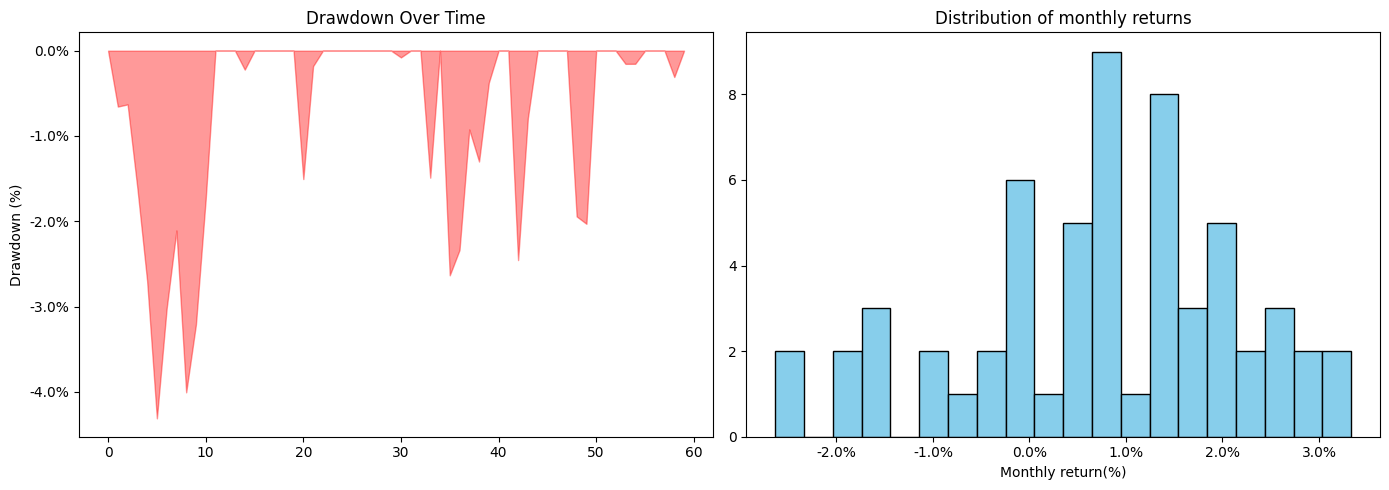

In [222]:
fig, axes = plt.subplots(1,2, figsize=(14,5))

axes[0].fill_between(monthly_nav.index,drawdown,0,color='red', alpha=0.4)
axes[0].set_title("Drawdown Over Time")
axes[0].set_ylabel("Drawdown (%)")
axes[0].yaxis.set_major_formatter(lambda x,_: f"{x*100:.1f}%")

axes[1].hist(monthly_nav['Monthly Return'].dropna(),bins=20,color="skyblue",edgecolor="black")
axes[1].set_title("Distribution of monthly returns")
axes[1].set_xlabel("Monthly return(%)")
axes[1].xaxis.set_major_formatter(lambda x,_: f"{x*100:.1f}%")

plt.tight_layout()
plt.show()

In [243]:
funds = df.merge(df_HBL, on="Date",suffixes=("fund1","fund2"),how="outer")
funds = funds.merge(df_MCB,on='Date',how='outer')
funds.rename(columns={"NAV":"NAVfund3"},inplace=True)

funds["Date"] = pd.to_datetime(funds["Date"])
funds.sort_values("Date", inplace=True)

funds.ffill(inplace=True)

In [244]:
returns = funds[["NAVfund1","NAVfund2","NAVfund3"]].pct_change().dropna()

In [246]:
def performance_metrics(nav):
    daily_returns = nav.pct_change().dropna()
    ann_return = (1 + daily_returns.mean())**252 - 1
    ann_vol = daily_returns.std() * np.sqrt(252)
    sharpe = ann_return / ann_vol
    cumulative_nav = nav.cummax()
    drawdown = (nav - cumulative_nav) / cumulative_nav
    max_dd = drawdown.min()
    return ann_return, ann_vol, sharpe, max_dd

for col in ["NAVfund1", "NAVfund2", "NAVfund3"]:
    funds[col] = pd.to_numeric(funds[col],errors="coerce")
    ann_ret, ann_vol, sharpe, max_dd = performance_metrics(funds[col])
    print(f"{col}: Return={ann_ret*100:.2f}%, Volatility={ann_vol*100:.2f}%, Sharpe={sharpe:.2f}, Max DD={max_dd*100:.2f}%")



NAVfund1: Return=6.92%, Volatility=3.02%, Sharpe=2.29, Max DD=-2.70%
NAVfund2: Return=2.88%, Volatility=5.94%, Sharpe=0.48, Max DD=-9.86%
NAVfund3: Return=8.28%, Volatility=5.22%, Sharpe=1.59, Max DD=-4.31%


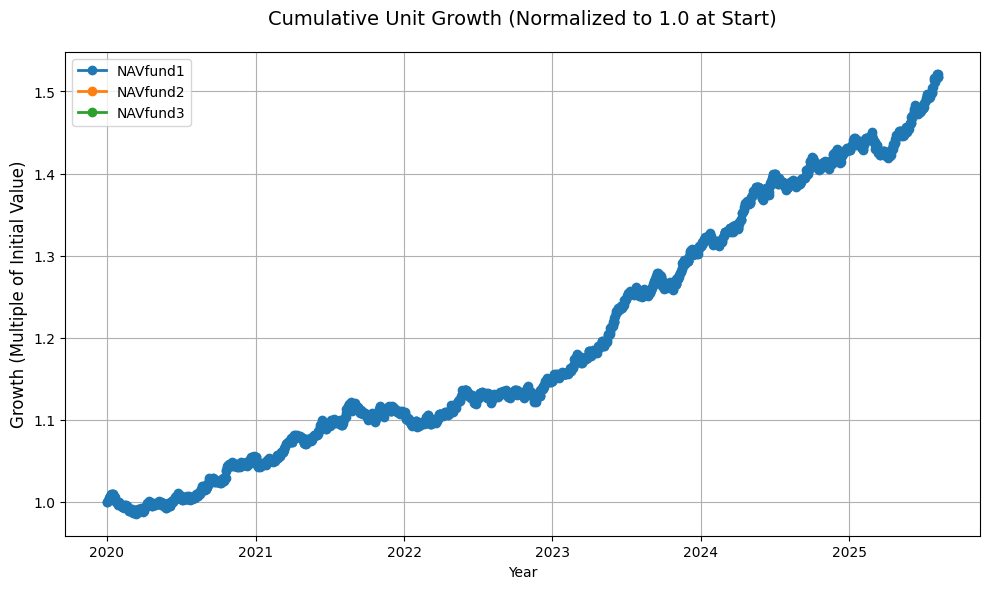

In [252]:
plt.figure(figsize=(10, 6))
for col in ["NAVfund1", "NAVfund2", "NAVfund3"]:
    plt.plot(funds["Date"], funds[col] / funds[col].iloc[0], label=col, marker='o', linewidth=2)

# Formatting
plt.title("Cumulative Unit Growth (Normalized to 1.0 at Start)", fontsize=14, pad=20)
plt.xlabel("Year")
plt.ylabel("Growth (Multiple of Initial Value)", fontsize=12)
plt.legend(fontsize=10, loc="upper left")
plt.grid(True)


plt.tight_layout()  # Prevent label clipping
plt.show()

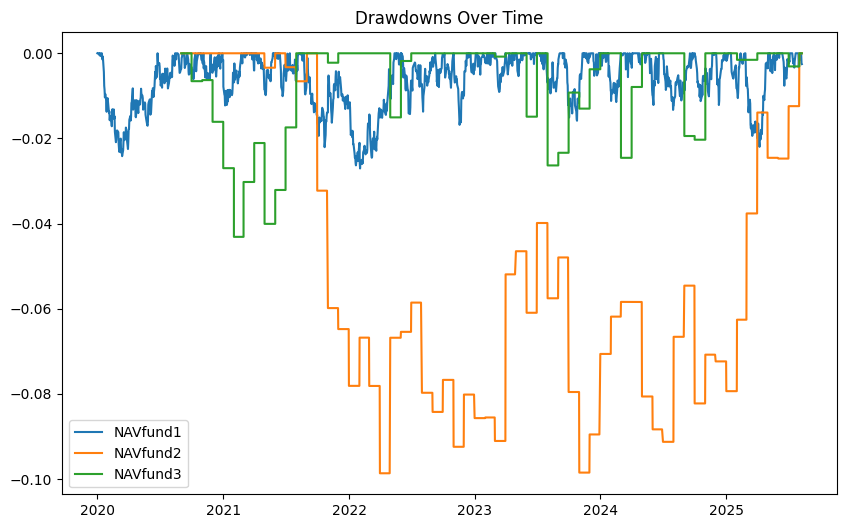

In [248]:
plt.figure(figsize=(10,6))
for col in ["NAVfund1", "NAVfund2", "NAVfund3"]:
    cum_max = funds[col].cummax()
    drawdown = (funds[col] - cum_max) / cum_max
    plt.plot(funds["Date"], drawdown, label=col)
plt.legend()
plt.title("Drawdowns Over Time")
plt.show()


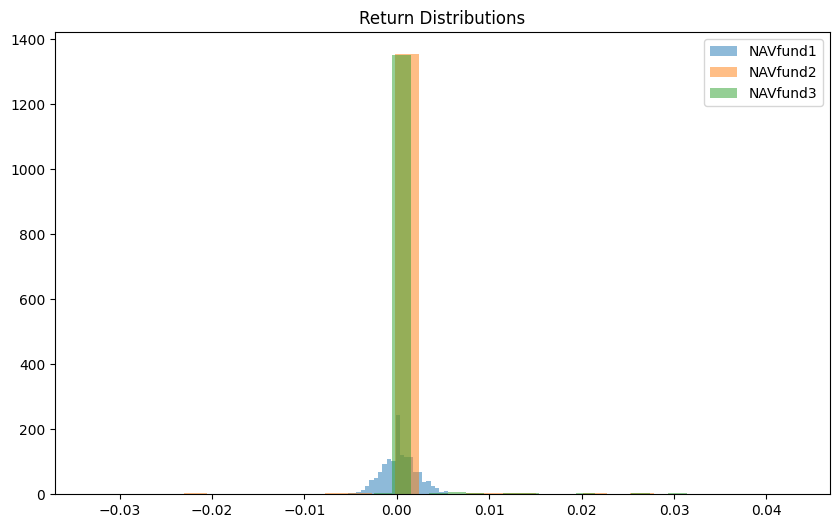

In [249]:
plt.figure(figsize=(10,6))
for col in ["NAVfund1", "NAVfund2", "NAVfund3"]:
    plt.hist(returns[col], bins=30, alpha=0.5, label=col)
plt.legend()
plt.title("Return Distributions")
plt.show()
